In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
import os
import pandas as pd
import anndata as ad
import seaborn as sns
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariateConditional,EstimatorSettings

In [62]:
sc.set_figure_params(figsize=(4,4),  dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
sc.settings.figdir = "/notebook/Joe/M-cells/analysis/figs_for_paper"
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code/WT_KO_thymus'

In [4]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_KO_3008_genes.h5ad")

# UMAPs

## Cell types

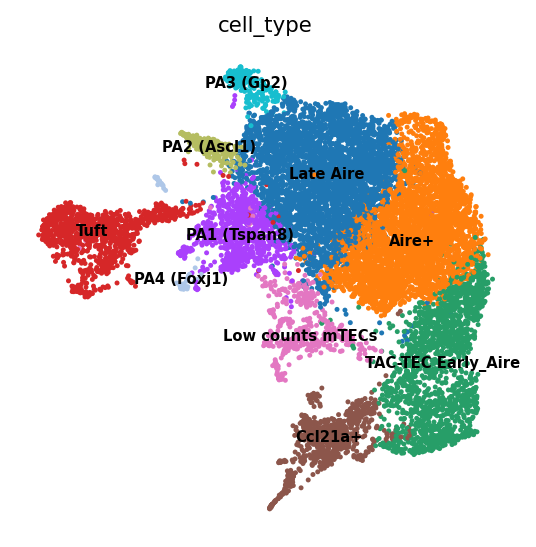

In [14]:
sc.pl.umap(
    adata,
    color="cell_type",
    s=20,
    legend_loc="on data",
    legend_fontsize="x-small",
)

## Genotypes

In [17]:
adata.obs.genotype.value_counts()

KO    6331
WT    6296
Name: genotype, dtype: int64

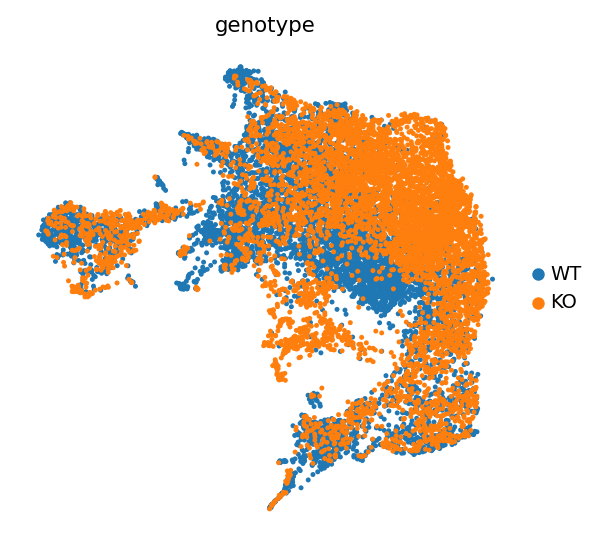

In [15]:
adata.obs.genotype.cat.reorder_categories(["WT", "KO"], inplace=True)
sc.pl.umap(
    adata,
    color="genotype",
    s=20,
)

## Feature plots (WT vs KO)

In [57]:
adataSubset = adata[adata.obs.cell_type.isin(["PA3 (Gp2)", "Aire+"])]
plotData = pd.DataFrame(adataSubset[:, "Sox8"].layers["scVI_normalized"], index=adataSubset.obs.index, columns=["Sox8"])

In [58]:
plotData["genotype"] = adata.obs.genotype
plotData["cell_type"] = adata.obs.cell_type
plotData.cell_type = plotData.cell_type.cat.remove_unused_categories()

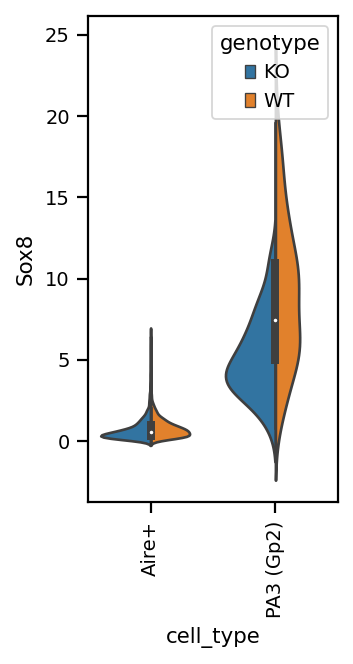

In [61]:
plt.figure(figsize=(2,4))
sns.violinplot(
    x=plotData.cell_type,
    y=plotData.Sox8,
    hue=plotData.genotype,
    split=True,
)
plt.xticks(rotation=90)
plt.show()

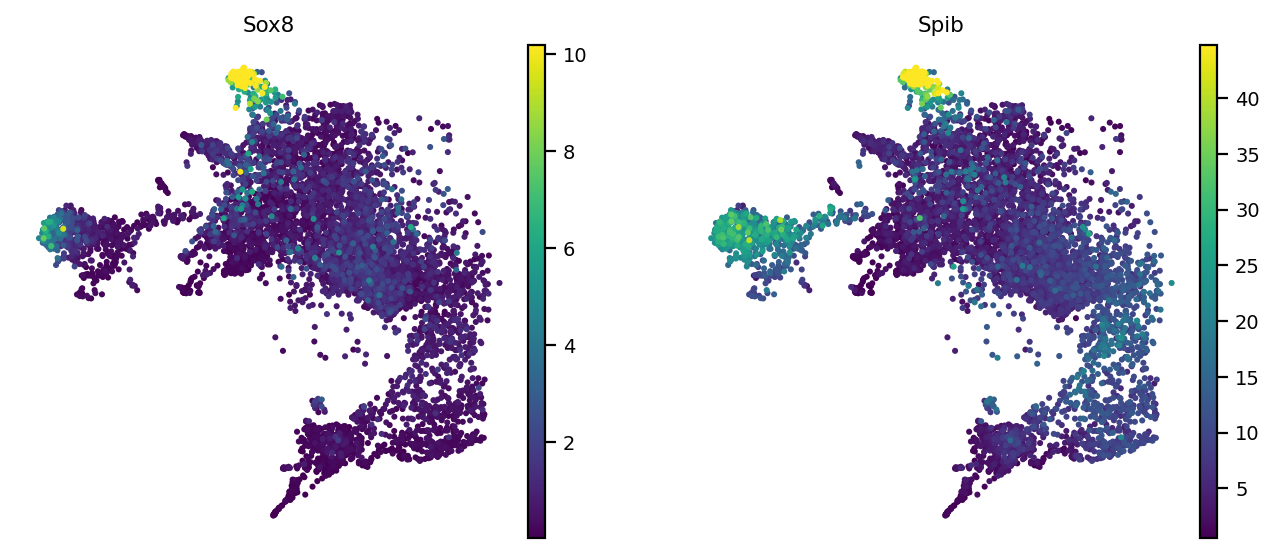

In [64]:
geneList = ["Sox8", "Spib"]
vmin = []
vmax = []
for gene in geneList:
    vmin.append(np.quantile(adata[adata.obs.genotype == "WT", gene].layers["scVI_normalized"], 0.01))
    vmax.append(np.quantile(adata[adata.obs.genotype == "WT", gene].layers["scVI_normalized"], 0.99))
sc.pl.umap(
    adata[adata.obs.genotype == "WT"],
    color=geneList,
    layer="scVI_normalized",
    vmin=vmin,
    vmax=vmax,
    s=30,
    save="_WT_TF_feature_plot.pdf",
)

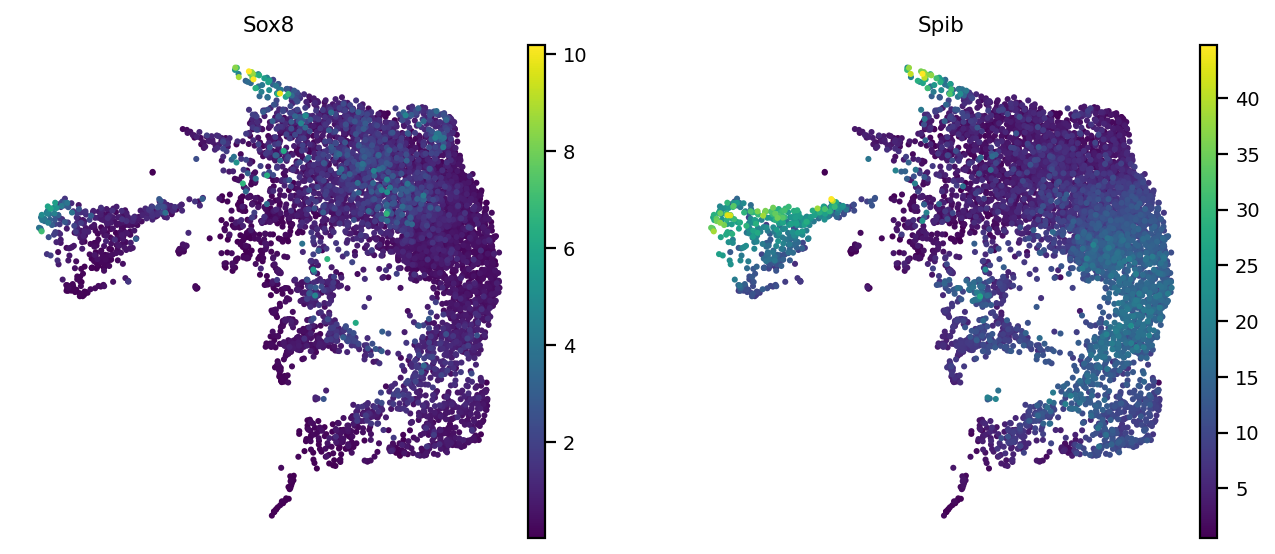

In [65]:
sc.pl.umap(
    adata[adata.obs.genotype == "KO"],
    color=geneList,
    layer="scVI_normalized",
    vmin=vmin,
    vmax=vmax,
    s=30,
    save="_KO_TF_feature_plot.pdf",
)